make characterization factors matrix 

index  = basin, month
col = elementary flows 
values = EQ CF

create dilution matrix = exposure/sensitivity ????
index = bain, month
value = column = channel storage


check matrix product to get the right dimensions

calculate the LCIA of water consupmtion impacts on biodiversity


TODO

update characterizatio nfactors for wetland: remove vulnerability
update characterizatio nfactors for streams: depends on the SDR paper, use average CFs
check regionalization of water consumption inventory: small basins have no consumption. check GIS solution
automate better the code. clean up the mess --> order the notebooks. create useful functions.


In [1]:
dir_in='C:/Users/easpi/Documents/PhD Water Footprint/Papers/water footprint scoping/'

In [2]:
#imports
import numpy  as np
import  pandas as pd
import os
import geopandas as gpd
#geopanda?

In [3]:
intersection=gpd.read_file(dir_in + "gis/intersect_basins_countries.gpkg")
intersection=intersection.drop(columns={"OBJECTID"})
intersection

countries = pd.unique(intersection["Country"])
basins = pd.unique(intersection["id_basin_pcrglob"])

basins_map  = gpd.read_file(dir_in + "gis/basins shapefile/basins_5min_pcrglobwb_withparam.gpkg").set_index("id_basin_pcrglob")
basins_map=basins_map.loc[basins]


intersection = intersection.set_index(['Country'])
#intersection

In [4]:
#CF for water ocnusmption impact on regional biodiversity of freshwater fish (in stream)
CF_ws_stream=pd.read_excel(dir_in + "CFs/SM2_SDR-based_CF_2022_03_23.xlsx")#in PDF.yr.m-3
CF_ws_stream=CF_ws_stream.drop(columns=['FF', 'FF_is_default_value', 'EF_M__m', 'EF_M_2.5',
       'EF_M_97.5', 'EF_M__is_default_value', 'EF_A__m', 'EF_A_2.5',
       'EF_A_97.5', 'EF_A__is_default_value', 'climate5', 'GEP_fish',
       'CF_M_2.5', 'CF_M_97.5', 'CF_M_m', 'CF_A_2.5', 'CF_A_97.5',
       'CF_GLOB_M_m', 'CF_GLOB_M_2.5', 'CF_GLOB_M_97.5', 
       'CF_GLOB_A_2.5', 'CF_GLOB_A_97.5'])
CF_ws_stream=CF_ws_stream.set_index(["id_basin_pcrglob"])#average CFs
CF_ws_stream=CF_ws_stream.loc[(basins)]#select only basins of interest
CF_ws_stream=CF_ws_stream[CF_ws_stream["CF_A_m"]!='No discharge depletion']#remove basin where no impact
CF_ws_stream=CF_ws_stream.astype(float)
CF_ws_stream

,CF_A_m,CF_GLOB_A_m
id_basin_pcrglob,,
2501,4.887969e-10,6.006373e-16
2475,2.544517e-11,1.508990e-17
2476,7.086818e-10,2.743424e-15
2549,2.556245e-10,7.180924e-16
2732,3.140781e-11,7.197048e-17
...,...,...
13186,9.359781e-05,1.195579e-12
13205,1.214862e-08,3.700172e-15
13187,7.406896e-09,1.187153e-15


#LCImpact for impacts of water ocnusmption on birds, amphibians ... inlcudes vulnerability
#we decided to remove wetlands
CF_ws_wetland = gpd.read_file(dir_in + "CFs/LC_impact_water_stress_core_regionalized.gpkg")
CF_ws_wetland=CF_ws_wetland.drop(columns = ['area', 'perimeter','geometry','CF_wetlandmedian'])
CF_ws_wetland=CF_ws_wetland.set_index(["id_basin_pcrglob"])#select only basins of interest 
CF_ws_wetland=CF_ws_wetland.loc[(basins)]
CF_ws_wetland

In [53]:
#CF_ws = CF_ws_wetland.merge(CF_ws_stream,how = 'outer',  on="id_basin_pcrglob")
#CF_ws["CF_ws_total"]=CF_ws["CF_wetlandmean"]+CF_ws["CF_M_m"]/12#conversion to PDF.month.m-3
#CF_ws["CF_ws_total"]=CF_ws["CF_M_m"]#conversion to PDF.yr.m-3
CF_ws=CF_ws_stream.copy()


In [54]:
#regionalize impacts on eutrophication

In [16]:
CF_usetox = pd.read_excel(dir_in + "CFs/usetox_freshwater_ecotox.xlsx")
CF_usetox=CF_usetox.set_index(["CAS"])
CF_usetox=CF_usetox.drop(columns=["substance_name","emission_compartment", "setting", "CF_midpoint_ecotox", "FF_sea"])

cas=pd.read_csv(dir_in + "code/output/chems_to_water_tox_2010.csv")
cas = pd.unique(cas['CAS_tox'])

CF_usetox=CF_usetox.loc[(cas)]
CF_usetox# CF for emissions to freshwtaer in europe. endpoint in PDF.day.m3/kg . fate in day-1
#only substances with LCI and quality requirements

,CF_endpoint_ecotox,FF_freshwater
CAS,,
542-75-6,4.220328e+03,19.795115
94-75-7,5.598461e+02,50.856208
94-82-6,9.052047e+02,50.850325
122-88-3,7.031767e+01,21.097638
30560-19-1,4.064165e+02,50.873748
...,...,...
60-57-1,1.130688e+06,118.917688
309-00-2,5.377530e+05,97.232756
72-20-8,2.168378e+07,117.322460


In [17]:
CF_usetox["FF_freshwater"]>360
#all chemcials have a time of residence <1year. to be ocmplete, background concentration in the basin should include emissions before 2010

CAS
542-75-6      False
94-75-7       False
94-82-6       False
122-88-3      False
30560-19-1    False
              ...  
60-57-1       False
309-00-2      False
72-20-8       False
76-44-8       False
2385-85-5     False
Name: FF_freshwater, Length: 380, dtype: bool

In [11]:
gep = pd.read_excel(dir_in + "CFs/GEP_fish_all.xlsx")
gep.columns=["basin","gep"]
gep.set_index("basin", inplace=True)

In [15]:
#import diluiton matrix 
exposure_volume= pd.read_csv(dir_in+"code/output/channel_storage_month2010_m3.csv")
exposure_volume=exposure_volume.iloc[:,1:]
exposure_volume.columns=["id_basin_pcrglob",1,2,3,4,5,6,7,8,9,10,11,12]
#["1","2","3","4","5","6",'7','8','9','10','11','12']
exposure_volume=pd.melt(exposure_volume,id_vars= 'id_basin_pcrglob',value_vars=[1,2,3,4,5,6,7,8,9,10,11,12],var_name="month", value_name="channel_storage")#use panda melt to converto to right format!

exposure_volume=exposure_volume.set_index(["id_basin_pcrglob","month"])
exposure_volume=exposure_volume.loc[(basins)]
exposure_volume#in m3


channel_storage
id_basin_pcrglob month                 
2501.0           1           1103452.60
                 2            794567.70
                 3            562447.30
                 4            525469.44
                 5           5708058.00
...                                 ...
13232.0          8           7537427.50
                 9           6623210.00
                 10          5941288.00
                 11          6990748.00
                 12          9234096.00

[12372 rows x 1 columns]

In [10]:
#combine inventory with CFs.

In [59]:
LCI_basin = pd.read_csv(dir_in + "code/output/LCI_basin_part3.csv").set_index(["basin",'month',"activity"])
LCI_basin

WC              P  542-75-6   94-75-7  \
basin month activity                                                      
2501  1     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
            agriculture  5041.759766     456.484525  0.000000  0.001256   
      2     domestic     9365.175781       0.000000  0.000000  0.000123   
            industry        0.000000       0.000000  0.000000  0.000326   
...                              ...            ...       ...       ...   
13232 11    industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   
      12    domestic        0.000000       0.000000  0.000000  0.000317   
            industry        0.000000       0.000000  0.000000  0.000561   
            agriculture     0.000000  207892.703637  0.125003  0.000000   

                          94-82-6  122-88-3  30560-19-1  34256-82-1  \
basin month activity                                                  
2501  1     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.001256       0.0    0.000440    0.002642   
      2     domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
...                           ...       ...         ...         ...   
13232 11    industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   
      12    domestic     0.000000       0.0    0.000000    0.000000   
            industry     0.000000       0.0    0.000000    0.000000   
            agriculture  0.000000       0.0    0.000408    0.000000   

                         135158-54-2  50594-66-6  ...  104-40-5  608-93-5  \
basin month activity                              ...                       
2501  1     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
            agriculture          0.0    0.000187  ...  0.000000  0.000000   
      2     domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000455  0.067762   
...                              ...         ...  ...       ...       ...   
13232 11    industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   
      12    domestic             0.0    0.000000  ...  0.000000  0.000000   
            industry             0.0    0.000000  ...  0.000784  0.028593   
            agriculture          0.0    0.000000  ...  0.000000  0.000000   

                         465-73-6  8001-35-2  50-29-3  60-57-1  309-00-2  \
basin month activity                                                       
2501  1     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      2     domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
...                           ...        ...      ...      ...       ...   
13232 11    industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   
      12    domestic          0.0        0.0      0.0      0.0       0.0   
            industry          0.0        0.0      0.0      0.0       0.0   
            agriculture       0.0        0.0      0.0      0.0       0.0   

                         72-20-8  76-44-8  2385-85-5  
basin month activity                                  
2501  1     domestic         0.0 

In [ ]:
#rerun results


In [60]:
LCIA_basin = pd.DataFrame(np.zeros(LCI_basin.shape), index=LCI_basin.index)
LCIA_basin.columns=LCI_basin.columns
LCIA_basin#ok

WC    P  542-75-6  94-75-7  94-82-6  122-88-3  \
basin month activity                                                      
2501  1     domestic     0.0  0.0       0.0      0.0      0.0       0.0   
            industry     0.0  0.0       0.0      0.0      0.0       0.0   
            agriculture  0.0  0.0       0.0      0.0      0.0       0.0   
      2     domestic     0.0  0.0       0.0      0.0      0.0       0.0   
            industry     0.0  0.0       0.0      0.0      0.0       0.0   
...                      ...  ...       ...      ...      ...       ...   
13232 11    industry     0.0  0.0       0.0      0.0      0.0       0.0   
            agriculture  0.0  0.0       0.0      0.0      0.0       0.0   
      12    domestic     0.0  0.0       0.0      0.0      0.0       0.0   
            industry     0.0  0.0       0.0      0.0      0.0       0.0   
            agriculture  0.0  0.0       0.0      0.0      0.0       0.0   

                         30560-19-1  34256-82-1  135158-54-2  50594-66-6  ...  \
basin month activity                                                      ...   
2501  1     domestic            0.0         0.0          0.0         0.0  ...   
            industry            0.0         0.0          0.0         0.0  ...   
            agriculture         0.0         0.0          0.0         0.0  ...   
      2     domestic            0.0         0.0          0.0         0.0  ...   
            industry            0.0         0.0          0.0         0.0  ...   
...                             ...         ...          ...         ...  ...   
13232 11    industry            0.0         0.0          0.0         0.0  ...   
            agriculture         0.0         0.0          0.0         0.0  ...   
      12    domestic            0.0         0.0          0.0         0.0  ...   
            industry            0.0         0.0          0.0         0.0  ...   
            agriculture         0.0         0.0          0.0         0.0  ...   

                         104-40-5  608-93-5  465-73-6  8001-35-2  50-29-3  \
basin month activity                                                        
2501  1     domestic          0.0       0.0       0.0        0.0      0.0   
            industry          0.0       0.0       0.0        0.0      0.0   
            agriculture       0.0       0.0       0.0        0.0      0.0   
      2     domestic          0.0       0.0       0.0        0.0      0.0   
            industry          0.0       0.0       0.0        0.0      0.0   
...                           ...       ...       ...        ...      ...   
13232 11    industry          0.0       0.0       0.0        0.0      0.0   
            agriculture       0.0       0.0       0.0        0.0      0.0   
      12    domestic          0.0       0.0       0.0        0.0      0.0   
            industry          0.0       0.0       0.0        0.0      0.0   
            agriculture       0.0       0.0       0.0        0.0      0.0   

                         60-57-1  309-00-2  72-20-8  76-44-8  2385-85-5  
basin month activity                                                     
2501  1     domestic         0.0       0.0      0.0      0.0        0.0  
            industry         0.0       0.0      0.0      0.0        0.0  
            agriculture      0.0       0.0      0.0      0.0        0.0  
      2     domestic         0.0       0.0      0.0      0.0        0.0  
            industry         0.0       0.0      0.0      0.0        0.0  
...                          ...       ...      ...      ...        ...  
13232 11    industry         0.0       0.0      0.0      0.0        0.0  
            agriculture      0.0       0.0      0.0      0.0        0.0  
      12    domestic         0.0       0.0      0.0      0.0        0.0  
            industry         0.0       0.0      0.0      0.0        0.0  
            agriculture      0.0       0.0      0.0      0.0        0.0  

[37116 rows x 382 columns]

In [61]:
#populate chemicals and water consumption. has to be PDF.d
# in the sanube basin (and maybe others) some ocuntries are not part of EU (e.g. bosnia)! 
#thus the total emissions are underestimated greatly in the danube 
basin = 0#adapt

for basin in basins:

    for month in np.arange(1,13,1):
        
        #LCIA_basin.loc[(basin,month)]['WC']=(LCI_basin.loc[(basin,month)]['WC']/(365/12))*(CF_ws.loc[(basin)]["CF_wetlandmean"]+CF_ws.loc[(basin)]["CF_M_m"]/365)
        #wetland (PDF.day.m-3) and in stream impacts (PDF.yr.m-3 ). consumption in m3/month. conversion done so that damage score in PDF.day
        LCIA_basin.loc[(basin,month)]['WC']=(LCI_basin.loc[(basin,month)]['WC'])*(CF_ws.loc[(basin)]["CF_A_m"]/365)
        
        for substance in cas:
            LCIA_basin.loc[(basin,month)][substance]=(LCI_basin.loc[(basin,month)][substance]/365)*CF_usetox.loc[(substance)]['CF_endpoint_ecotox']/exposure_volume.loc[(basin,month)]["channel_storage"]
            #ecotox impacts in PDF.day.m-3, volume of dilution in m3, substance emission in kg/yr
        #LCIA_basin.loc[(basin,month,"industry")]['WC']= elec + mfg + Min#np.nansum(elec,mfg,Min)#replace nan by 0
        #LCIA_basin.loc[(basin,month,"agriculture")]['WC']=liv+irr#np.nansum(liv,irr)

C:\Users\easpi\AppData\Local\Temp\ipykernel_12868\2042760721.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  LCIA_basin.loc[(basin,month)]['WC']=(LCI_basin.loc[(basin,month)]['WC'])*(CF_ws.loc[(basin)]["CF_A_m"]/365)
C:\Users\easpi\AppData\Local\Temp\ipykernel_12868\2042760721.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  LCIA_basin.loc[(basin,month)][substance]=(LCI_basin.loc[(basin,month)][substance]/365)*CF_usetox.loc[(substance)]['CF_endpoint_ecotox']/exposure_volume.loc[(basin,month)]["channel_storage"]


In [62]:
#populate eutrophicaiton impacts . has to be PDF.d
#P impact on EQ in (PDF.d.m3/kg crop).
FE=pd.read_csv(dir_in+"eutrophication/FE_impact_2010_country.csv").set_index("country")
#check units. we need kg crops * impact score
country = 0

for country in countries:
    basin = 0
    month = 0
    
    chems_in_country=FE.loc[(country)]["total_country"]#ok, here it is directly yhe impact in PDF day m3
    intersect_country = intersection.loc[(country)]#ok
    basins_in_country = intersect_country.id_basin_pcrglob#ok
    
    if basins_in_country.shape==():#country is one basin. it happens only for basin 10719
        
        basin = basins_in_country
        coeff=1

        for month in np.arange(1,13,1):
            
            if exposure_volume.loc[(basin,month)]["channel_storage"]>0:
                LCIA_basin.loc[(basin,month,"agriculture")]["P"]=coeff*chems_in_country/exposure_volume.loc[(basin,month)]["channel_storage"]
            else:
                LCIA_basin.loc[(basin,month,"agriculture")]["P"]=np.nan
            #for each month P impact is PDF day m3 / channel storage m3 in the month

    else:#there are many basins in the country
        
            #for each basin
            for basin in basins_in_country:

                coeff=intersect_country[intersect_country["id_basin_pcrglob"]==basin]["%area_country"].values
                #coeff is the ratio of emissions associated with the basin in the country
                #it equals the ratio of the areas of the intersecitoncountry and basin and area of the ocuntry

            #print(coeff)

            #for each month
                for month in np.arange(1,13,1):
                    if exposure_volume.loc[(basin,month)]["channel_storage"]>0:
                        LCIA_basin.loc[(basin,month,"agriculture")]["P"]=coeff*chems_in_country/exposure_volume.loc[(basin,month)]["channel_storage"]
                    else:
                        LCIA_basin.loc[(basin,month,"agriculture")]["P"]=np.nan

In [22]:
#LCIA_basin.to_csv(dir_in+"/code/output/LCIA_eq.csv")

In [5]:
LCIA_basin.to_csv(dir_in+"code/output/LCIA3_20220818.csv")#check the units

NameError: name 'LCIA_basin' is not defined

In [10]:
LCIA_basin= pd.read_csv(dir_in+"code/output/LCIA3_20220818.csv").set_index(["basin",'month',"activity"])
LCIA_basin

WC             P      542-75-6  \
basin month activity                                                
2501  1     domestic     1.254156e-08  0.000000e+00  0.000000e+00   
            industry     0.000000e+00  0.000000e+00  0.000000e+00   
            agriculture  6.751771e-09  3.918648e-07  0.000000e+00   
      2     domestic     1.254156e-08  0.000000e+00  0.000000e+00   
            industry     0.000000e+00  0.000000e+00  0.000000e+00   
...                               ...           ...           ...   
13232 11    industry     0.000000e+00  0.000000e+00  0.000000e+00   
            agriculture  0.000000e+00  1.496894e-05  2.067523e-07   
      12    domestic     0.000000e+00  0.000000e+00  0.000000e+00   
            industry     0.000000e+00  0.000000e+00  0.000000e+00   
            agriculture  0.000000e+00  1.133236e-05  1.565235e-07   

                              94-75-7       94-82-6  122-88-3    30560-19-1  \
basin month activity                                                          
2501  1     domestic     1.714143e-10  0.000000e+00       0.0  0.000000e+00   
            industry     4.527114e-10  0.000000e+00       0.0  0.000000e+00   
            agriculture  1.745289e-09  2.821925e-09       0.0  4.440038e-10   
      2     domestic     2.380509e-10  0.000000e+00       0.0  0.000000e+00   
            industry     6.287011e-10  0.000000e+00       0.0  0.000000e+00   
...                               ...           ...       ...           ...   
13232 11    industry     1.231877e-10  0.000000e+00       0.0  0.000000e+00   
            agriculture  0.000000e+00  0.000000e+00       0.0  6.501289e-11   
      12    domestic     5.258019e-11  0.000000e+00       0.0  0.000000e+00   
            industry     9.326029e-11  0.000000e+00       0.0  0.000000e+00   
            agriculture  0.000000e+00  0.000000e+00       0.0  4.921854e-11   

                           34256-82-1  135158-54-2  50594-66-6  ...  \
basin month activity                                            ...   
2501  1     domestic     0.000000e+00          0.0         NaN  ...   
            industry     0.000000e+00          0.0         NaN  ...   
            agriculture  3.265236e-07          0.0         NaN  ...   
      2     domestic     0.000000e+00          0.0         NaN  ...   
            industry     0.000000e+00          0.0         NaN  ...   
...                               ...          ...         ...  ...   
13232 11    industry     0.000000e+00          0.0         NaN  ...   
            agriculture  0.000000e+00          0.0         NaN  ...   
      12    domestic     0.000000e+00          0.0         NaN  ...   
            industry     0.000000e+00          0.0         NaN  ...   
            agriculture  0.000000e+00          0.0         NaN  ...   

                             608-93-5  465-73-6  8001-35-2  50-29-3  60-57-1  \
basin month activity                                                           
2501  1     domestic     0.000000e+00       0.0        0.0      0.0      0.0   
            industry     7.474032e-06       0.0        0.0      0.0      0.0   
            agriculture  0.000000e+00       0.0        0.0      0.0      0.0   
      2     domestic     0.000000e+00       0.0        0.0      0.0      0.0   
            industry     1.037953e-05       0.0        0.0      0.0      0.0   
...                               ...       ...        ...      ...      ...   
13232 11    industry     4.977966e-07       0.0        0.0      0.0      0.0   
            agriculture  0.000000e+00       0.0        0.0      0.0      0.0   
      12    domestic     0.000000e+00       0.0        0.0      0.0      0.0   
            industry     3.768610e-07       0.0        0.0      0.0      0.0   
            agriculture  0.000000e+00       0.0        0.0      0.0      0.0   

                         309-00-2  72-20-8  76-44-8  2385-85-5       FET  
basin month activity                                                 

In [13]:
substance_analysis=LCIA_basin.groupby("basin").sum().multiply(gep["gep"], axis=0, level="basin").sum(axis=0)
substance_analysis=substance_analysis[substance_analysis>0].dropna(how="all")
#substance contrbution analysis
for i in np.arange(300): 
    print(substance_analysis.index[i],";",substance_analysis[i])

WC ; 0.0661065084988454
P ; 0.08064939143611836
542-75-6 ; 0.10141977878703756
94-75-7 ; 0.005306609754436915
94-82-6 ; 0.0001431023058674728
122-88-3 ; 7.669602807678207e-13
30560-19-1 ; 0.0001257403153152398
34256-82-1 ; 0.06021070079378585
74070-46-5 ; 0.1733083143324846
15972-60-8 ; 0.28691140720181485
91-22-5 ; 7.703871365469272e-05
67375-30-8 ; 0.3203463023618763
834-12-8 ; 0.0011736684679366945
33089-61-1 ; 0.0015963853617034045
61-82-5 ; 0.001331620508049986
1912-24-9 ; 0.28745654450314917
2642-71-9 ; 0.37367395785378715
86-50-0 ; 0.1086438172136927
4658-28-0 ; 1.559511501556162e-05
41083-11-8 ; 0.1469200252355653
3813-05-6 ; 2.1902381088811137e-06
22781-23-3 ; 0.03152756754828782
1861-40-1 ; 0.007409564034087148
82560-54-1 ; 0.027169589831007868
25057-89-0 ; 3.8219526059599346e-05
29104-30-1 ; 0.000118454242100269
1929-88-0 ; 3.506919753888998e-06
68359-37-5 ; 4.52111302309165
42576-02-3 ; 0.011799629487555712
82657-04-3 ; 0.04849053069483014
28434-01-7 ; 0.008824816540798603


In [20]:
#map results for water stress, eutrophicaiton, ecotox 
LCIA_basin["FET"]=np.sum(LCIA_basin.iloc[:,np.isin(LCIA_basin.columns,cas)],axis = 1)
LCIA_basin.columns

Index(['WC', 'P', '542-75-6', '94-75-7', '94-82-6', '122-88-3', '30560-19-1',
       '34256-82-1', '135158-54-2', '50594-66-6',
       ...
       '608-93-5', '465-73-6', '8001-35-2', '50-29-3', '60-57-1', '309-00-2',
       '72-20-8', '76-44-8', '2385-85-5', 'FET'],
      dtype='object', length=383)

In [21]:
LCIA_summary = LCIA_basin.drop(columns=LCIA_basin.columns[~np.isin(LCIA_basin.columns,["WC","FET","P"])])
# in PDF.d
LCIA_summary.columns=["eq_wc","eq_fe","eq_fet"]#water stress, eutrophication, toxicity
LCIA_summary["eq"]=LCIA_summary["eq_wc"]+LCIA_summary["eq_fe"]+LCIA_summary['eq_fet']
#LCIA_summary["eq_wc"]=LCIA_summary["eq_wc"]
LCIA_summary["eq_pol"]=LCIA_summary["eq_fe"]+LCIA_summary['eq_fet']

In [22]:
LCIA_summary_glo=LCIA_summary.multiply(gep["gep"], axis=0, level="basin")
LCIA_summary_glo.columns=LCIA_summary_glo.columns + "_glo"
#pdf.d

In [23]:
LCIA_summary=pd.concat([LCIA_summary.loc[basins],LCIA_summary_glo.loc[basins]], axis=1)
#pdf.d

In [24]:
#LCIA_summary.loc[LCIA_summary['eq_pol']+LCIA_summary['eq_wc']!=LCIA_summary['eq'],:]#ok

In [25]:
#LCIA_summary.sum(axis=0, level=['basin'], skipna=True)

In [26]:
LCIA=LCIA_summary.groupby(['basin','activity']).sum()#sum of monthly impacts and sector impacts
LCIA

eq_wc         eq_fe        eq_fet            eq  \
basin activity                                                              
2475  agriculture  0.000000e+00  4.633076e-10  3.295976e-07  3.300610e-07   
      domestic     0.000000e+00  0.000000e+00  1.684380e-06  1.684380e-06   
      industry     0.000000e+00  0.000000e+00  2.053671e-05  2.053671e-05   
2476  agriculture  2.684212e-08  2.368786e-09  1.685158e-06  1.714369e-06   
      domestic     3.940498e-08  0.000000e+00  8.611850e-06  8.651255e-06   
...                         ...           ...           ...           ...   
23276 domestic     0.000000e+00  0.000000e+00  3.946169e-02  3.946169e-02   
      industry     0.000000e+00  0.000000e+00  1.885353e-01  1.885353e-01   
24212 agriculture  2.512381e-07  3.061059e-10  3.128757e-07  5.644199e-07   
      domestic     5.304442e-08  0.000000e+00  1.133683e-07  1.664127e-07   
      industry     2.206922e-08  0.000000e+00  5.416372e-07  5.637065e-07   

                         eq_pol     eq_wc_glo     eq_fe_glo    eq_fet_glo  \
basin activity                                                              
2475  agriculture  3.300610e-07  0.000000e+00  2.747581e-16  1.954633e-13   
      domestic     1.684380e-06  0.000000e+00  0.000000e+00  9.988979e-13   
      industry     2.053671e-05  0.000000e+00  0.000000e+00  1.217901e-11   
2476  agriculture  1.687526e-06  1.039103e-13  9.169961e-15  6.523522e-12   
      domestic     8.611850e-06  1.525432e-13  0.000000e+00  3.333789e-11   
...                         ...           ...           ...           ...   
23276 domestic     3.946169e-02  0.000000e+00  0.000000e+00  4.150080e-06   
      industry     1.885353e-01  0.000000e+00  0.000000e+00  1.982775e-05   
24212 agriculture  3.131818e-07  3.683914e-08  4.488442e-11  4.587707e-08   
      domestic     1.133683e-07  7.777922e-09  0.000000e+00  1.662323e-08   
      industry     5.416372e-07  3.236017e-09  0.000000e+00  7.942047e-08   

                         eq_glo    eq_pol_glo  
basin activity                                 
2475  agriculture  1.957380e-13  1.957380e-13  
      domestic     9.988979e-13  9.988979e-13  
      industry     1.217901e-11  1.217901e-11  
2476  agriculture  6.636603e-12  6.532692e-12  
      domestic     3.349043e-11  3.333789e-11  
...                         ...           ...  
23276 domestic     4.150080e-06  4.150080e-06  
      industry     1.982775e-05  1.982775e-05  
24212 agriculture  8.276110e-08  4.592196e-08  
      domestic     2.440116e-08  1.662323e-08  
      industry     8.265649e-08  7.942047e-08  

[3093 rows x 10 columns]

In [68]:
#LCIA.to_csv(dir_in+"code/output/LCIA_eq_summary_20220818.csv")

In [4]:
#LCIA=pd.read_csv(dir_in+"code/output/LCIA_eq_summary_20220818.csv")#pdf.d

In [27]:
#IMPORTANT
LCIA.replace(0,np.nan).groupby(['activity']).sum()

,eq_wc,eq_fe,eq_fet,eq,eq_pol,eq_wc_glo,eq_fe_glo,eq_fet_glo,eq_glo,eq_pol_glo
activity,,,,,,,,,,
agriculture,852.536527,29626.199018,1.329081e+07,1.737875e+07,1.737790e+07,0.064437,0.080649,55.950915,60.102903,60.038466
domestic,12.607936,0.000000,1.885552e+07,1.885553e+07,1.885552e+07,0.000731,0.000000,53.139981,53.140712,53.139981
industry,13.624668,0.000000,8.707737e+07,8.707738e+07,8.707737e+07,0.000939,0.000000,230.054028,230.054967,230.054028


In [9]:
LCIA.replace(0,np.nan).groupby(['activity']).median()

,basin,eq_wc,eq_fe,eq_fet,eq,eq_pol,eq_wc_glo,eq_fe_glo,eq_fet_glo,eq_glo,eq_pol_glo
activity,,,,,,,,,,,
agriculture,9822.0,0.000133,0.000752,0.451009,0.467707,0.426814,8.315486e-10,2.677853e-09,0.000002,0.000002,0.000001
domestic,9822.0,0.000013,NaN,0.520063,0.525545,0.520063,1.387226e-10,NaN,0.000002,0.000002,0.000002
industry,9822.0,0.000012,NaN,1.825466,1.835696,1.825466,9.911234e-11,NaN,0.000006,0.000006,0.000006


In [28]:
LCIA_sector=pd.pivot(LCIA.reset_index(), index = 'basin',columns='activity',values = LCIA.columns )
LCIA_sector=pd.concat([LCIA_sector["eq"]["agriculture"],LCIA_sector["eq"]["domestic"],LCIA_sector["eq"]["industry"]], axis = 1)#sector contribution to total unattended demand
LCIA_sector.columns=["eq_agri","eq_dom","eq_ind"]#where water ocnsumption is unknown, we have total eq impact = NAN in spite of the fact that we do have basin s with pollution ipmacts
#LCIA_sector["eq"]=LCIA_sector["eq_agri"]+LCIA_sector["eq_ind"]+LCIA_sector["eq_dom"]
LCIA_sector.dropna()#pdf.d

,eq_agri,eq_dom,eq_ind
basin,,,
2475,3.300610e-07,1.684380e-06,2.053671e-05
2476,1.714369e-06,8.651255e-06,1.049995e-04
2501,2.524635e-03,1.288355e-02,1.570801e-01
2549,1.546028e-06,7.876067e-06,9.369341e-05
2723,1.878748e-02,5.840114e-02,4.974884e-02
...,...,...,...
20891,4.568266e-02,1.653661e-02,7.900661e-02
20980,1.638013e-02,5.929422e-03,2.832888e-02
21003,1.796579e-02,6.503416e-03,3.107122e-02


In [29]:
temp=np.log10(pd.concat([LCIA_sector,LCIA.groupby("basin").sum()/365],axis = 1).replace(0,np.nan))# IN LOG10(PDF.yr)
temp[np.isinf(temp)]=np.nan
temp.columns ="log10_"+temp.columns
temp

,log10_eq_agri,log10_eq_dom,log10_eq_ind,log10_eq_wc,log10_eq_fe,log10_eq_fet,log10_eq,log10_eq_pol,log10_eq_wc_glo,log10_eq_fe_glo,log10_eq_fet_glo,log10_eq_glo,log10_eq_pol_glo
basin,,,,,,,,,,,,,
2475,-6.481406,-5.773560,-4.687469,NaN,-11.896423,-7.209133,-7.209124,-7.209124,NaN,-18.123342,-13.436052,-13.436043,-13.436043
2476,-5.765896,-5.062921,-3.978813,-9.741126,-11.187767,-6.500477,-6.500218,-6.500468,-15.153284,-16.599925,-11.912635,-11.912377,-11.912626
2501,-2.597801,-1.889965,-0.803879,-9.196044,-8.012833,-3.325543,-3.325533,-3.325534,-15.106560,-13.923349,-9.236059,-9.236049,-9.236050
2549,-5.810783,-5.103691,-4.028291,-9.165938,-11.237319,-6.550028,-6.548969,-6.550019,-14.717360,-16.788741,-12.101450,-12.100391,-12.101441
2723,-1.726132,-1.233579,-1.303217,-9.645757,-7.545018,-3.458739,-3.458703,-3.458703,-15.347146,-13.246407,-9.160129,-9.160093,-9.160093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20891,-1.340249,-1.781554,-1.102337,-12.083847,-6.912466,-3.412516,-3.412379,-3.412379,-16.344165,-11.172785,-7.672834,-7.672697,-7.672697
20980,-1.785683,-2.226988,-1.547771,NaN,-7.357900,-3.857950,-3.857813,-3.857813,NaN,-10.608584,-7.108634,-7.108497,-7.108497
21003,-1.745554,-2.186858,-1.507642,-10.911784,-7.317771,-3.817821,-3.817684,-3.817684,-15.221151,-11.627138,-8.127188,-8.127051,-8.127051


In [31]:
test=pd.concat([LCIA_sector,LCIA.groupby("basin").sum()/365],axis = 1).replace(0.0,np.nan)
test[test>0]


,eq_agri,eq_dom,eq_ind,eq_wc,eq_fe,eq_fet,eq,eq_pol,eq_wc_glo,eq_fe_glo,eq_fet_glo,eq_glo,eq_pol_glo
basin,,,,,,,,,,,,,
2475,3.300610e-07,1.684380e-06,2.053671e-05,NaN,1.269336e-12,6.178270e-08,6.178397e-08,6.178397e-08,NaN,7.527619e-19,3.663937e-14,3.664012e-14,3.664012e-14
2476,1.714369e-06,8.651255e-06,1.049995e-04,1.814989e-10,6.489825e-12,3.158809e-07,3.160689e-07,3.158874e-07,7.026121e-16,2.512318e-17,1.222827e-12,1.223555e-12,1.222852e-12
2501,2.524635e-03,1.288355e-02,1.570801e-01,6.367316e-10,9.708830e-09,4.725603e-04,4.725706e-04,4.725700e-04,7.824205e-16,1.193028e-14,5.806856e-10,5.806983e-10,5.806975e-10
2549,1.546028e-06,7.876067e-06,9.369341e-05,6.824364e-10,5.790039e-12,2.818200e-07,2.825082e-07,2.818258e-07,1.917079e-15,1.626520e-17,7.916801e-13,7.936134e-13,7.916963e-13
2723,1.878748e-02,5.840114e-02,4.974884e-02,2.260702e-10,2.850902e-08,3.477451e-04,3.477739e-04,3.477736e-04,4.496283e-16,5.670125e-14,6.916260e-10,6.916831e-10,6.916827e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20891,4.568266e-02,1.653661e-02,7.900661e-02,8.244284e-13,1.223302e-07,3.867979e-04,3.869202e-04,3.869202e-04,4.527252e-17,6.717620e-12,2.124055e-08,2.124727e-08,2.124727e-08
20980,1.638013e-02,5.929422e-03,2.832888e-02,NaN,4.386313e-08,1.386915e-04,1.387354e-04,1.387354e-04,NaN,2.462723e-11,7.786924e-08,7.789387e-08,7.789387e-08
21003,1.796579e-02,6.503416e-03,3.107122e-02,1.225226e-11,4.810926e-08,1.521175e-04,1.521656e-04,1.521656e-04,6.009654e-16,2.359727e-12,7.461259e-09,7.463620e-09,7.463619e-09


In [32]:
map_LCIA_annual=basins_map.reset_index().merge(pd.concat([LCIA_sector/365,LCIA.groupby("basin").sum()/365,temp],axis = 1),left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
#in pdf.yr!!!

In [35]:
map_LCIA_annual.columns

Index(['id_basin_pcrglob', 'area', 'perimeter', 'geometry', 'eq_agri',
       'eq_dom', 'eq_ind', 'eq_wc', 'eq_fe', 'eq_fet', 'eq', 'eq_pol',
       'eq_wc_glo', 'eq_fe_glo', 'eq_fet_glo', 'eq_glo', 'eq_pol_glo',
       'log10_eq_agri', 'log10_eq_dom', 'log10_eq_ind', 'log10_eq_wc',
       'log10_eq_fe', 'log10_eq_fet', 'log10_eq', 'log10_eq_pol',
       'log10_eq_wc_glo', 'log10_eq_fe_glo', 'log10_eq_fet_glo',
       'log10_eq_glo', 'log10_eq_pol_glo'],
      dtype='object')

In [73]:
#map_LCIA_annual1=intersection.reset_index().merge(pd.concat([LCIA_sector,LCIA.groupby("basin").sum(),temp],axis = 1),left_on="id_basin_pcrglob",right_on="basin",how ="outer")#km3
#LCIA=pd.read_csv(dir_in+"code/output/LCIA_eq_summary.csv").set_index(["basin","activity"])
#LCIA

In [33]:
#LCIA.groupby("activity").sum()/365     #filter extreme values

In [34]:
l=[]
for i in np.arange(0,1,0.1):
    l.append(LCIA.quantile(q=i))
l[5]

eq_wc         0.000000
eq_fe         0.000000
eq_fet        0.777487
eq            0.870907
eq_pol        0.846993
eq_wc_glo     0.000000
eq_fe_glo     0.000000
eq_fet_glo    0.000002
eq_glo        0.000003
eq_pol_glo    0.000002
Name: 0.5, dtype: float64

In [14]:
#map_LCIA_annual=gpd.read_file(dir_in+"code/output/LCIA_EQ.gpkg",drive='GPKG')


In [36]:
#map_LCIA_annual.to_file(dir_in+"/code/output/LCIA_EQ_20220818.gpkg", driver="GPKG")#needs to be corrected the water ocnsumtion is too high
#map_LCIA_annual["eq_m-2"]=np.log10(map_LCIA_annual["eq"]/map_LCIA_annual["area"])

#map_LCIA_annual=gpd.read_file(dir_in+"/code/output/LCIA_EQ.gpkg", driver="GPKG")
map_LCIA_annual.to_file(dir_in+"/code/output/LCIA_EQ.gpkg", driver="GPKG")#pdf.yr!!!

In [19]:
#highest index for continental europe is basin = 13000 

In [37]:
continental_eu=map_LCIA_annual[map_LCIA_annual['id_basin_pcrglob']<13000]

In [45]:
#outline=continental_eu.boundary.plot(figsize=(10, 10), color="Gray")

<AxesSubplot:>

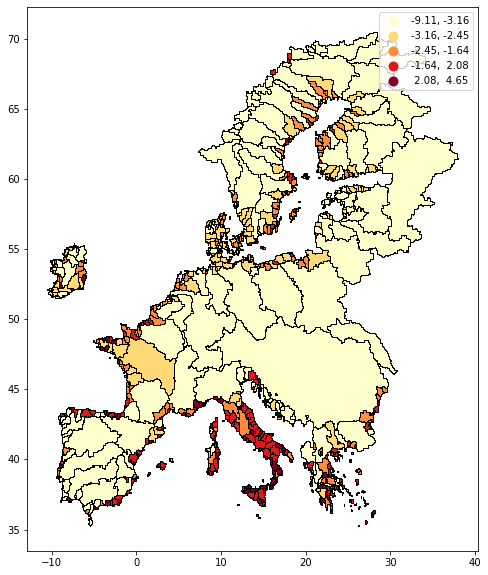

In [39]:
continental_eu.plot(column="log10_eq",#log10 pdf.yr (days removed)
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                    cmap="YlOrRd",
                    #ax=outline
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                    
                    )


<AxesSubplot:>

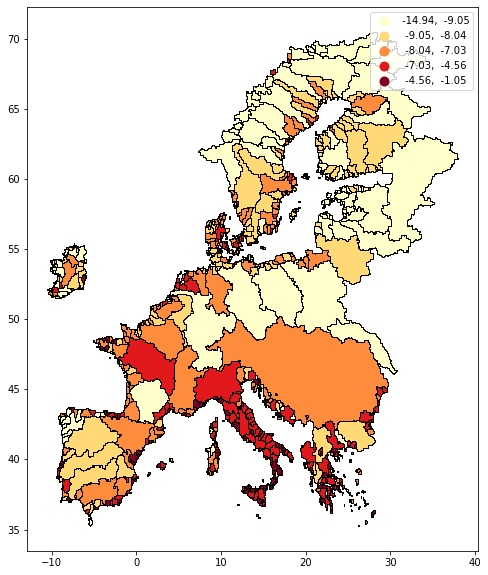

In [40]:
continental_eu.plot(column="log10_eq_glo",
                     #categorical=False,
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                    )


<AxesSubplot:>

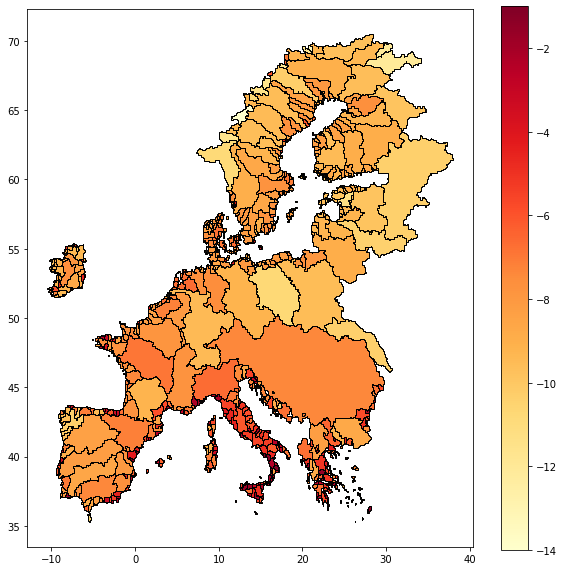

In [41]:
continental_eu.plot(column="log10_eq_glo",
                     #categorical=False,
                     #scheme="equalinterval",
                     edgecolor="k",
                     vmin=-14,
                     vmax=-1,
                    #k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                    )


In [42]:
#LCIA_basin.to_csv(dir_in+"code/output/LCIA2.csv")#check the units

<AxesSubplot:>

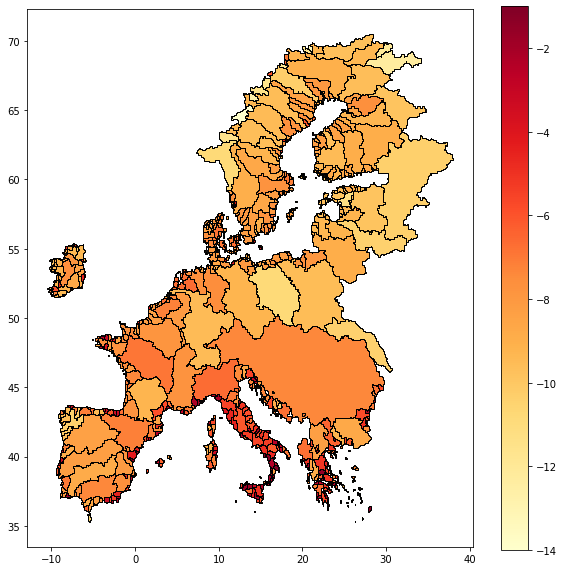

In [43]:
continental_eu.plot(column="log10_eq_fet_glo",  
                     edgecolor="k",
                     vmin=-14,
                     vmax=-1,
                    #k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                      )

<AxesSubplot:>

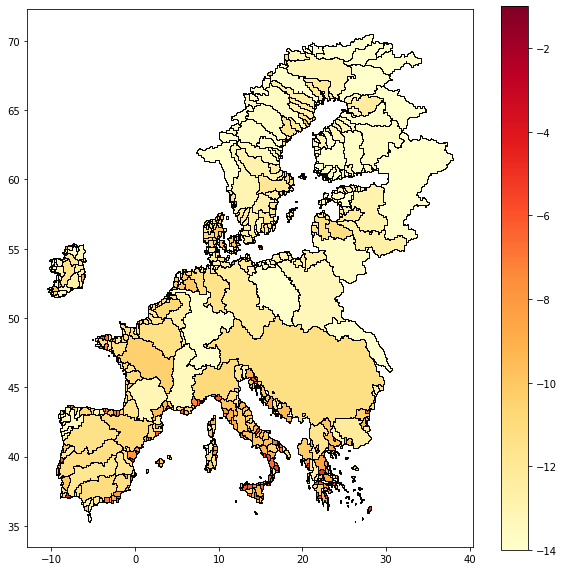

In [44]:
continental_eu.plot(column="log10_eq_fe_glo",                     
edgecolor="k",
                     vmin=-14,
                     vmax=-1,
                    #k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                      )

<AxesSubplot:>

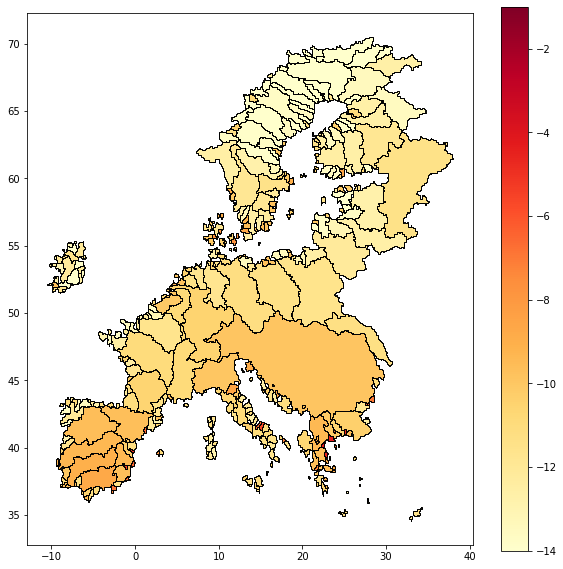

In [33]:



continental_eu.plot(#ax=outline,
                    column="log10_eq_wc_glo",                     
                    edgecolor="k",
                     vmin=-14,
                     vmax=-1,
                    #k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                     )

In [82]:
#secor grouping

continental_eu.columns



Index(['id_basin_pcrglob', 'area', 'perimeter', 'geometry', 'eq_agri',
       'eq_dom', 'eq_ind', 'eq_wc', 'eq_fe', 'eq_fet', 'eq', 'eq_pol',
       'eq_wc_glo', 'eq_fe_glo', 'eq_fet_glo', 'eq_glo', 'eq_pol_glo',
       'log10_eq_agri', 'log10_eq_dom', 'log10_eq_ind', 'log10_eq_wc',
       'log10_eq_fe', 'log10_eq_fet', 'log10_eq', 'log10_eq_pol',
       'log10_eq_wc_glo', 'log10_eq_fe_glo', 'log10_eq_fet_glo',
       'log10_eq_glo', 'log10_eq_pol_glo'],
      dtype='object')

<AxesSubplot:>

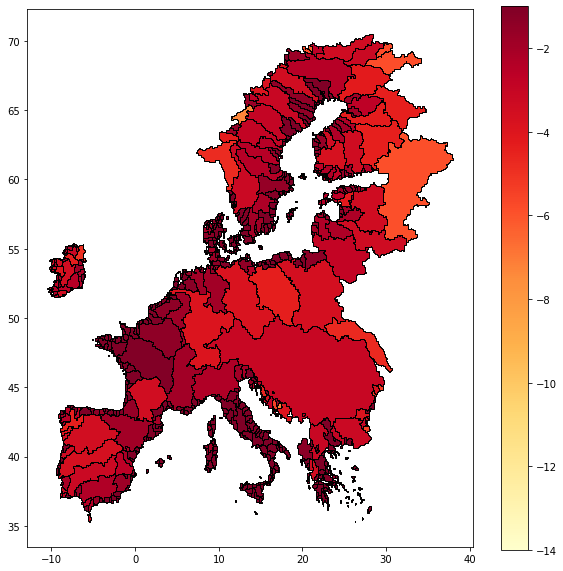

In [83]:
continental_eu.plot(column="log10_eq_agri",                     
                    edgecolor="k",
                     vmin=-14,
                     vmax=-1,
                    #k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(10,10),
                     #missing_kwds={'color': 'lightgrey'}
                     #legend_kwds={'label': "Total ecosystem damage from water use",'orientation': "horizontal"}
                     cmap="YlOrRd"
                    )

<AxesSubplot:>

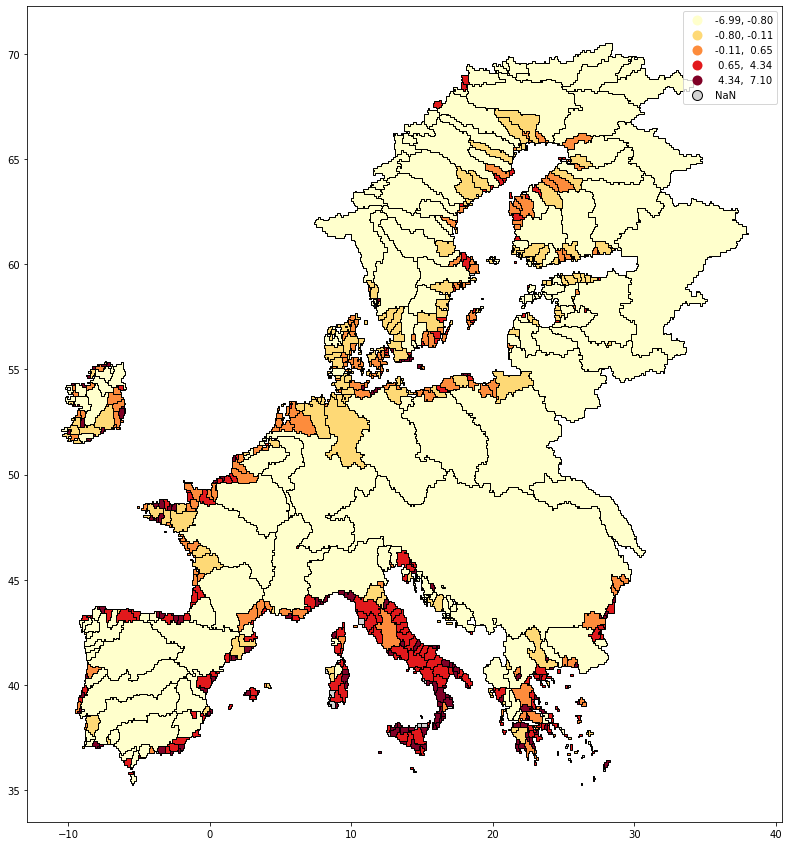

In [85]:
continental_eu.plot(column="log10_eq_ind",                     
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                    cmap="YlOrRd",
                     missing_kwds={'color': 'lightgrey'}
                    )

<AxesSubplot:>

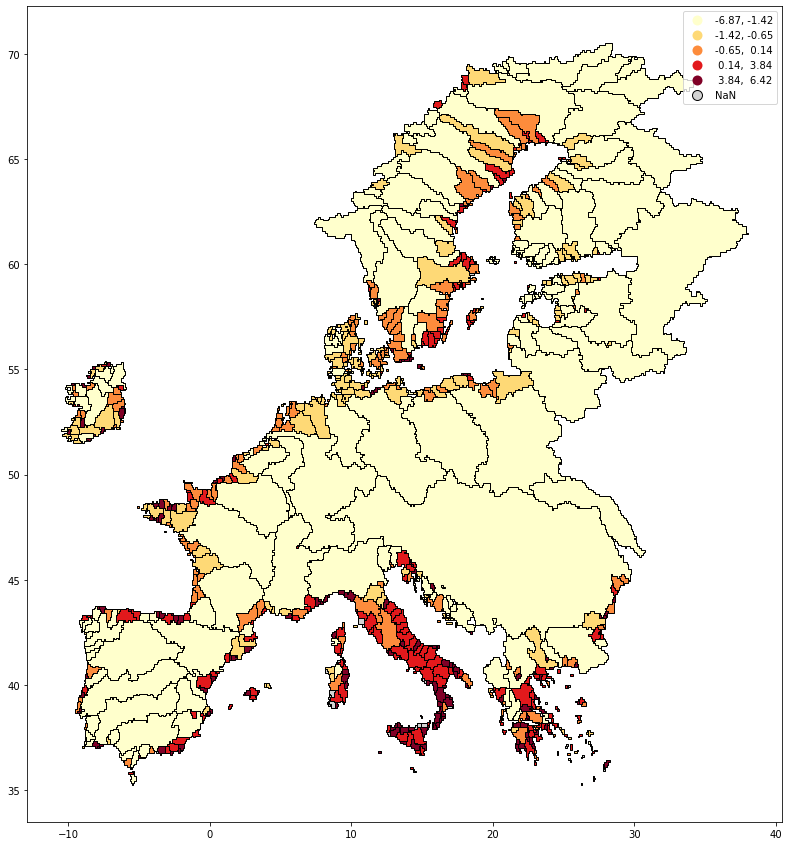

In [86]:
continental_eu.plot(column="log10_eq_dom",                     
                     scheme="Quantiles",
                     edgecolor="k",
                     #vmin=0,
                     k=5,
                     legend=True,
                     #legend_kwds={'loc': "upper left"},
                     figsize=(15,15),
                    cmap="YlOrRd",
                     missing_kwds={'color': 'lightgrey'}
                    )